In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (6,134 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128288 files and di

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns


In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import folium

## 기본 좌표 설정

In [4]:
# 위도
latitude = 37.394946

# 경도
longitude = 127.111104

In [5]:
# 코드입력
m = folium.Map(location=[latitude, longitude],
               zoom_start=17, 
               width=750, 
               height=500
              )
m

In [6]:
# 코드입력
folium.Marker([latitude, longitude],
              popup="판교역",
              tooltip="판교역 입구").add_to(m)
m

In [7]:
!pip install teddynote -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 10.0 MB/s eta 0:00:00


In [8]:
from teddynote import dataset

dataset.download('소상공인상권정보')

======= 다운로드 시작 =======

data/상권정보_서울.csv


  0%|          | 0.00/173M [00:00<?, ?B/s]

data/상권정보_경기.csv


  0%|          | 0.00/273M [00:00<?, ?B/s]


======= 다운로드 완료 =======


In [9]:
import pandas as pd

# 코드입력
df = pd.read_csv('./data/상권정보_경기.csv')
df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,20713599,눈높이러닝센타,NaN,R,학문/교육,R13,학문교육기타,R13A01,학습지보급,P85503,...,4121010100101490006003352,NaN,경기도 광명시 오리로 946,423010.0,14221.0,NaN,NaN,2,126.858147,37.478530
1,20642964,유니베라,구성대리점,D,소매,D16,화장품소매,D16A01,화장품판매점,G47813,...,4146311200103740000023783,NaN,경기도 용인시 기흥구 구성로64번길 1,446525.0,16919.0,NaN,2,NaN,127.116575,37.294690
2,24510829,엠아이케이21,NaN,D,소매,D14,운동/경기용품소매,D14A01,운동/경기용품,G47631,...,4113511400102400000029712,무지개마을동아아파트,경기도 성남시 분당구 구미로144번길 8,463937.0,13622.0,901,NaN,90,127.123291,37.340903


컬럼 정보를 출력 합니다.

In [10]:
pd.Series(df.columns)

0        상가업소번호
1           상호명
2           지점명
3     상권업종대분류코드
4      상권업종대분류명
5     상권업종중분류코드
6      상권업종중분류명
7     상권업종소분류코드
8      상권업종소분류명
9      표준산업분류코드
10      표준산업분류명
11         시도코드
12          시도명
13        시군구코드
14         시군구명
15        행정동코드
16         행정동명
17        법정동코드
18         법정동명
19         지번코드
20       대지구분코드
21        대지구분명
22        지번본번지
23        지번부번지
24         지번주소
25        도로명코드
26          도로명
27        건물본번지
28        건물부번지
29       건물관리번호
30          건물명
31        도로명주소
32        구우편번호
33        신우편번호
34          동정보
35          층정보
36          호정보
37           경도
38           위도
dtype: object

In [22]:
#행정동 명이 '백현동', '정자동'인 데이터만 추출출

sub_df = df.loc[df['행정동명'].isin(['백현동', ' 정자동'])]

In [23]:
#'백현동', '정자동'에서 '위도','경도', '상호명' 만 추출하여 target_df 변수에 저장장

target_df = sub_df[['위도', '경도', '상호명']]

In [24]:
target_df

,위도,경도,상호명
102,37.392785,127.112071,처가방
244,37.389333,127.110756,백현
897,37.386944,127.110626,도미솔피아노
1775,37.383811,127.112233,그리너리네일
8598,37.383395,127.089563,큰집쭈꾸미보리밥
...,...,...,...
513736,37.386509,127.113997,윈도우워시
514190,37.386935,127.115415,나
514586,37.384993,127.112377,보니따라움
515824,37.384859,127.111408,티랩


In [28]:
#마커로 찍기 입력

for index, location_info in target_df.iterrows():
    folium.Marker([location_info["위도"], location_info["경도"]], popup=location_info["상호명"]).add_to(m)

In [29]:
m

## 클러스터 생성

In [30]:
from folium.plugins import MarkerCluster

m = folium.Map(
    location=[latitude, longitude],
    zoom_start=15
)

coords = sub_df[['위도', '경도']]

In [31]:
# 코드입력
marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)
m

## 서울 지도에서 행정 구역별 표시

In [39]:
import requests
import json

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)
seoul_geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

서울 지역의 구별 boundary 시각화

In [40]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
)

# 코드입력
folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m

### `Stamen Toner` 적용시

In [41]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    # 타일변경
    tiles='Stamen Toner'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m

### `cartodbpositron` 적용시

In [ ]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    # 타일변경
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m

## 서울시 자치구별 상권정보 시각화

- [소상공인시장진흥공단 상권 정보 데이터셋 다운로드](https://www.data.go.kr/data/15083033/fileData.do)

`seoul` 데이터프레임에 소상공인시장진흥공단에서 제공하는 **서울시 상권정보 csv 파일**을 로드합니다. 

In [32]:
import pandas as pd

# 서울 상권정보 데이터를 로드합니다
seoul = pd.read_csv('./data/상권정보_서울.csv')

# 필요한 컬럼 정보만 가져옵니다
seoul = seoul[['시군구명', '상권업종대분류명', '상권업종중분류명', '위도', '경도']]
seoul

,시군구명,상권업종대분류명,상권업종중분류명,위도,경도
0,송파구,소매,의복의류,37.493054,127.147321
1,영등포구,소매,건강/미용식품,37.520613,126.907168
2,성동구,소매,취미/오락관련소매,37.566857,127.049018
3,동작구,음식,한식,37.487105,126.980952
4,종로구,음식,한식,37.572387,126.981794
...,...,...,...,...,...
325875,마포구,부동산,부동산중개,37.557971,126.907290
325876,은평구,소매,시계/귀금속소매,37.604195,126.936049
325877,은평구,소매,애견/애완/동물,37.596790,126.905613
325878,광진구,음식,커피점/카페,37.556004,127.085023


In [33]:
plt.rc('font', family='NanumBarunGothic') 

서울시의 `상권업종중분류명`에 따른 데이터 개수를 시각화 합니다.

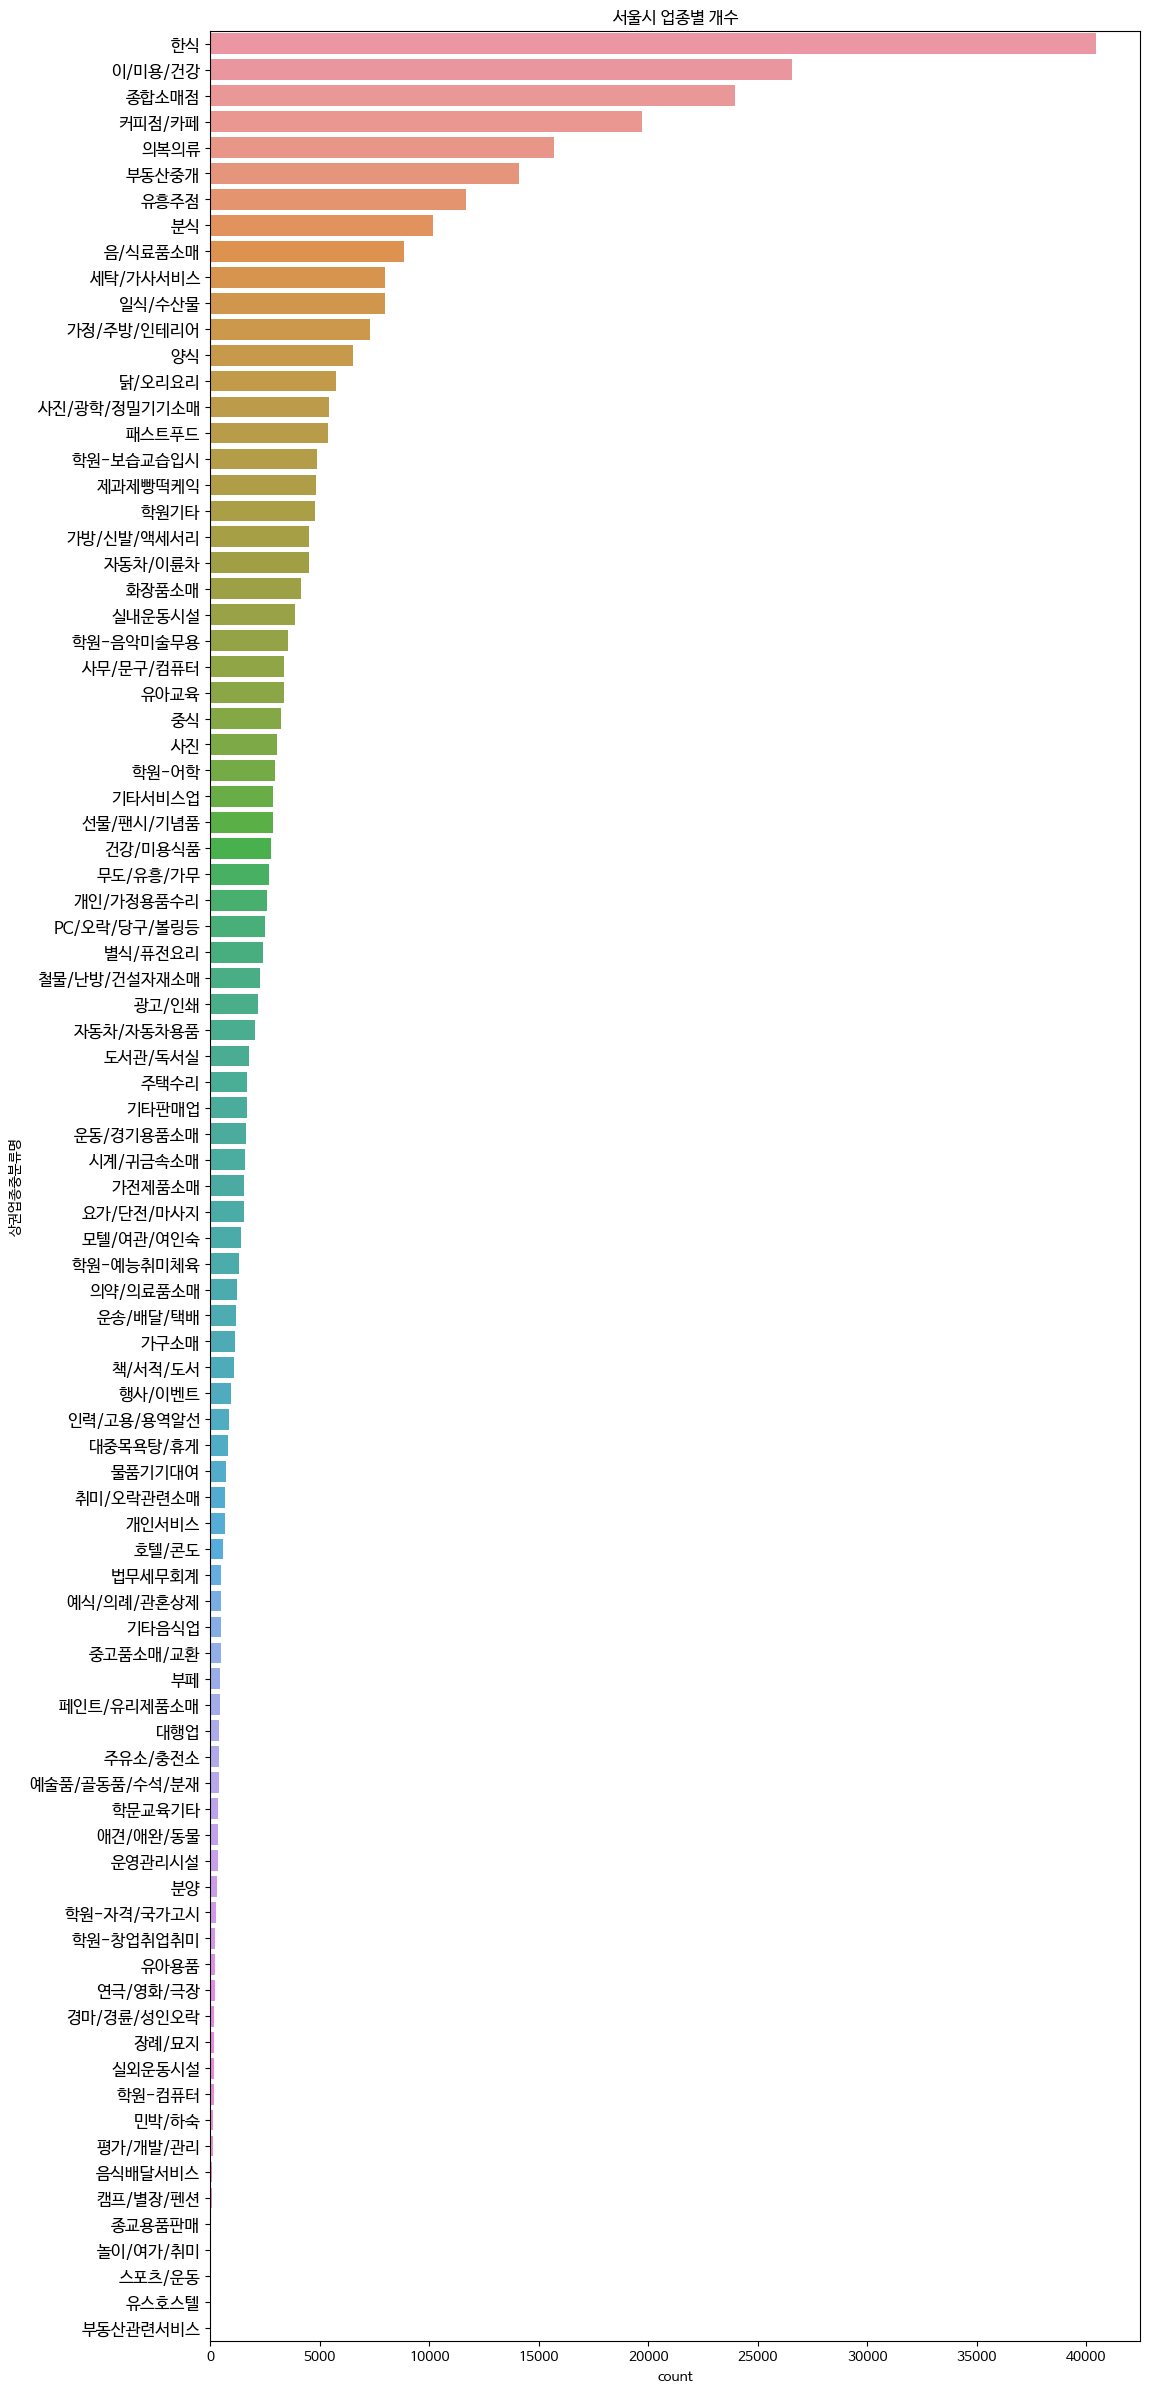

In [34]:
plt.figure(figsize=(12, 30))
sns.countplot(y=seoul['상권업종중분류명'], order=seoul['상권업종중분류명'].value_counts().index)
plt.yticks(fontsize=12)
plt.title('서울시 업종별 개수')
plt.show()

그럼 **커피점/카페** 업종은 자치구별로 **어느 곳에 가장 많이 분포**해 있는지 시각화해 보겠습니다.

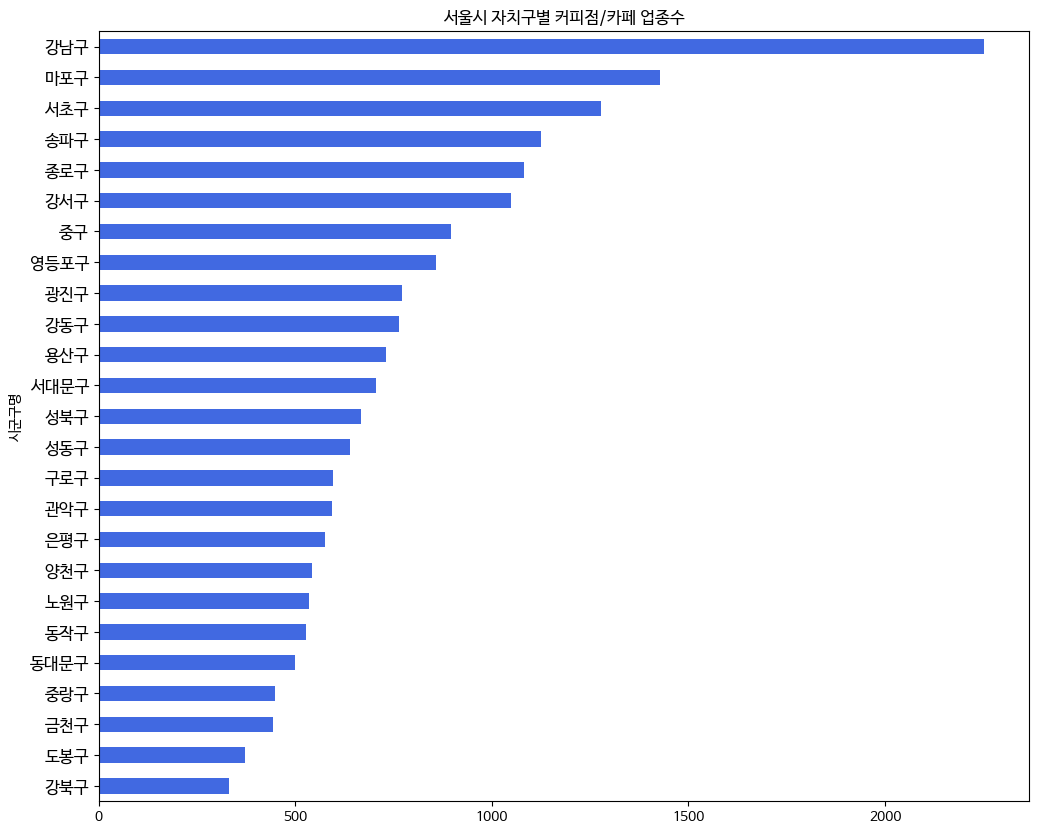

In [36]:
plt.figure(figsize=(12, 10))
seoul.loc[seoul['상권업종중분류명'] == '커피점/카페'].groupby('시군구명')['상권업종중분류명'].count()\
                                                     .sort_values().plot(kind='barh', color='royalblue')
plt.yticks(fontsize=12)
plt.title('서울시 자치구별 커피점/카페 업종수')
plt.show()

강남구가 가장 많은 수를 차지하고 강북구는 가장 적은 수를 차지하였습니다.

이제 이를 folium 위에 시각화를 해보겠습니다.

In [37]:
#상권업종중분류명이 커피점/카페인 데이터만 추출하여 seoul_coffee에 저장장
seoul_coffee = seoul.loc[seoul['상권업종중분류명']=='커피점/카페']

seoul_coffee

,시군구명,상권업종대분류명,상권업종중분류명,위도,경도
29,종로구,음식,커피점/카페,37.583149,127.000171
109,도봉구,음식,커피점/카페,37.658728,127.034746
190,마포구,음식,커피점/카페,37.554599,126.929692
200,강서구,음식,커피점/카페,37.580941,126.813358
206,양천구,음식,커피점/카페,37.522055,126.842935
...,...,...,...,...,...
325715,서대문구,음식,커피점/카페,37.557293,126.950705
325754,금천구,음식,커피점/카페,37.468602,126.902047
325788,마포구,음식,커피점/카페,37.540241,126.948240
325791,강서구,음식,커피점/카페,37.532109,126.839080


In [47]:
seoul_geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

In [48]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=12, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m

클러스터를 추가하여 지도위에 시각화 합니다.

In [49]:
marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(seoul_coffee['위도'], seoul_coffee['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)

m

Output hidden; open in https://colab.research.google.com to view.

In [56]:
#시군구명 별 상권업종 중분류명이 커피점/카페인 것을 추출하여 seoul_group_data 변수에 저장장

seoul_group_data = seoul.loc[seoul['상권업종중분류명']=='커피점/카페'].groupby('시군구명')['상권업종중분류명'].count()
seoul_group_data

시군구명
강남구     2253
강동구      763
강북구      330
강서구     1048
관악구      593
광진구      771
구로구      596
금천구      444
노원구      534
도봉구      373
동대문구     499
동작구      526
마포구     1427
서대문구     704
서초구     1277
성동구      640
성북구      668
송파구     1125
양천구      543
영등포구     859
용산구      730
은평구      575
종로구     1082
중구       895
중랑구      448
Name: 상권업종중분류명, dtype: int64

`choropleth` 를 사용하여 시각화를 하면 업종 별 개수에 따른 색상의 차이를 두어 시각화를 해줍니다.

In [57]:
# 1. map을 만든다 
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m

In [58]:
# 코드입력
m.choropleth(geo_data=seoul_geo,
             data=seoul_group_data, 
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="지역구별 커피 업종 수"
            )
m

/usr/local/lib/python3.9/dist-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


`bins`를 만들어 **1/4, 2/4, 3/4분위수별**로 구간을 나누어 시각화할 수 있습니다.

In [59]:
# 코드입력
bins = list(seoul_group_data.quantile([0, 0.25, 0.5, 0.75, 1]))

m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=seoul_group_data, 
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="지역구별 커피 업종 수", 
             bins=bins
            )
m

## Html 파일로 저장

저장은 `save()` 함수로 쉽게 html 파일로 저장할 수 있습니다.

In [ ]:
m.save('map.html')

## 참고 (References)

- [Folium 0.12.1 documentation](https://python-visualization.github.io/folium/)
- [folium을 이용하여 서울시 동별 인구 수 시각화하기](https://d-hyeon.tistory.com/2)
- [지도 핸들링_folium](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=jymoon1115&logNo=221392797679)
- 데이터& 코드: teddylee/dip github